In [1]:
# importa as bibliotecas

from bs4 import BeautifulSoup
import requests 
import time
import datetime

import smtplib

In [2]:
# conecta ao site da amazon
#página que quero fazer a raspagem (busca na amazon: data+analyst+puzzle) 
URL_BROWSER = 'https://www.amazon.com.br/gp/aw/d/B07W86KF3Z/?_encoding=UTF8&pd_rd_plhdr=t&aaxitk=c04d56317f2e2a90da09f685cd7d5a4e&hsa_cr_id=0&qid=1743447845&sr=1-1-9e67e56a-6f64-441f-a281-df67fc737124&ref_=sbx_be_s_sparkle_dlcd_asin_0_img&pd_rd_w=VwfVr&content-id=amzn1.sym.0af9561b-236a-4456-ac39-e3caccb7758c%3Aamzn1.sym.0af9561b-236a-4456-ac39-e3caccb7758c&pf_rd_p=0af9561b-236a-4456-ac39-e3caccb7758c&pf_rd_r=XXYNGJ968KA5AMGT4W4X&pd_rd_wg=WwTgC&pd_rd_r=d3198359-f61c-4ae6-9a46-19c44ba19d02'
#define agente para conexão
cabecalhos = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36", "X-Amzn-Trace-Id": "Root=1-67e72499-459f02932c24af7c25a41fca"}
#obtém a página
pagina = requests.get(URL_BROWSER, headers=cabecalhos)
#soup transforma conteúdo em html
Soup = BeautifulSoup(pagina.content,"html.parser")
#mostra conteúdo soup
#print(Soup)



In [3]:
# torna o resultado do soup em código + legível
SoupPret = BeautifulSoup(Soup.prettify(),"html.parser")
#print(SoupPret)

CAPTURA TITULO DA IMAGEM A PARTIR DA TAG


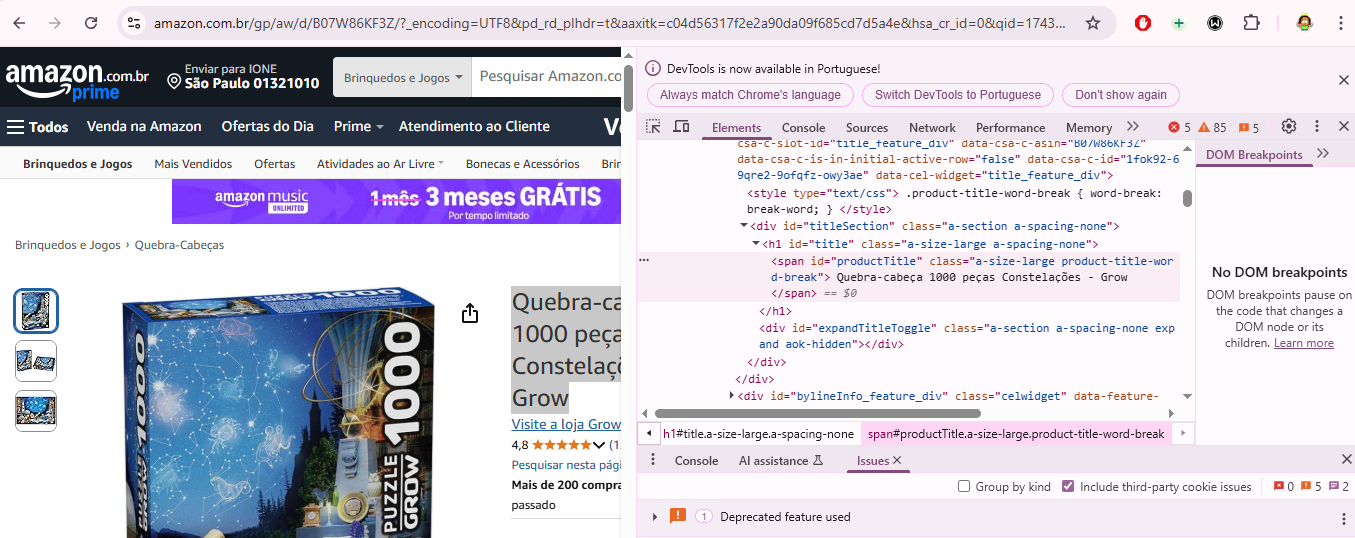

In [4]:
#apresenta o titulo raspado da pagina, conforme tag id "productTitle" acima
titulo = SoupPret.find(id="productTitle").get_text()
print(titulo)



              Quebra-cabeça 1000 peças Constelações - Grow
             


CAPTURA PREÇO DA IMAGEM A PARTIR DA TAG

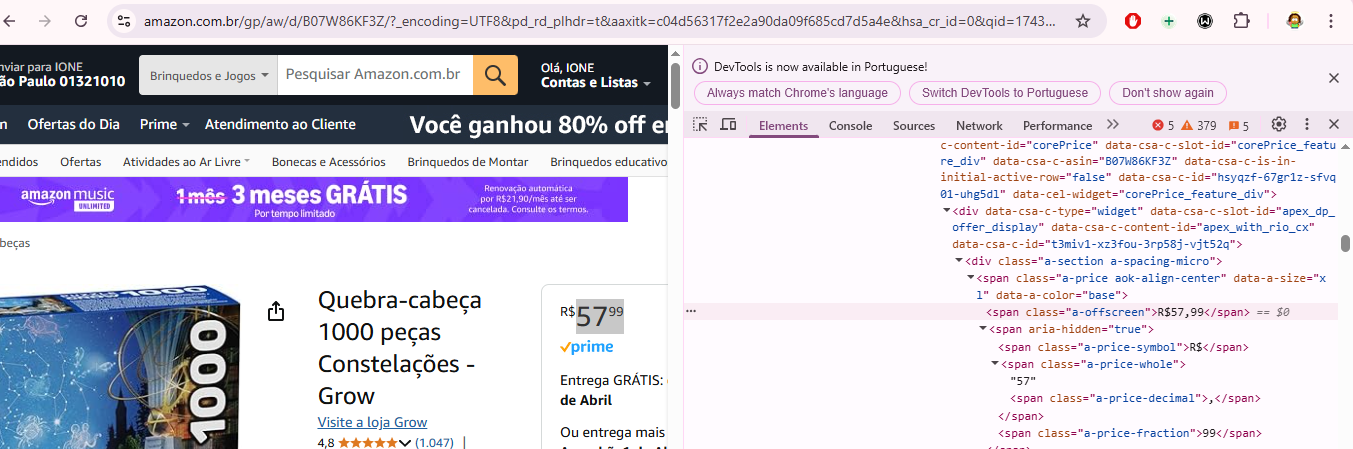

In [5]:
#apresenta o preço raspado da pagina, conforme class span "a-offscreen" acima
#preco_reais = SoupPret.find(name="span", class_="a-price-whole").getText()
#preco_centavos = SoupPret.find(name="span", class_="a-price-fraction").getText()
#total_preco = (float(f"{preco_reais}{preco_centavos}"))

preco = SoupPret.find("span", {"class": "a-offscreen"}).text
print(preco)


                  R$57,99
                 


In [6]:
#pega os valores limpos para extração e armazenamento no excel (csv)
titulo = titulo.strip()
preco = preco.strip()[2:]

print(titulo)
print(preco)


Quebra-cabeça 1000 peças Constelações - Grow
57,99


In [7]:
# exporta os dados obtidos da raspagem para um arquivo csv que será criado
import csv

lst_cabecalhos = ['Titulo','Preco']
lst_dados = [titulo,preco]

# w = separador com espaços
with open('DatasetWebScrapAmazon.csv',  mode="w", newline='', encoding='utf-8-sig') as e:
    writer = csv.writer(e, delimiter=';')
    writer.writerow(lst_cabecalhos)
    writer.writerow(lst_dados)

Segue arquivo csv gerado:

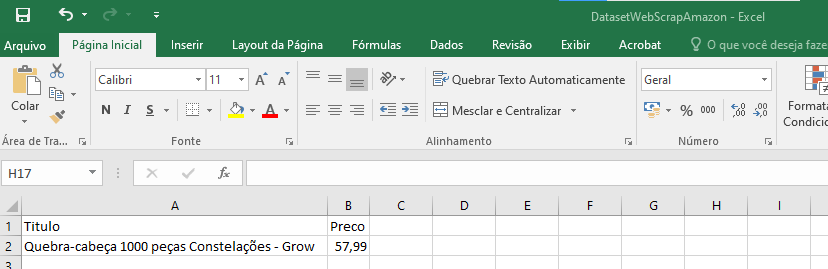

In [8]:
# adiciona a data da importação ao arquivo

import datetime

data_exportacao = datetime.date.today()

print(data_exportacao)

2025-03-31


In [9]:
# implementa esta informação ao dataset já criado

import csv

lst_cabecalhos = ['Titulo','Preco','Data_Export']
lst_dados = [titulo,preco,data_exportacao]

# w = separador com espaços
with open('DatasetWebScrapAmazon.csv',  mode="w", newline='', encoding='utf-8-sig') as e:
    writer = csv.writer(e, delimiter=';')
    writer.writerow(lst_cabecalhos)
    writer.writerow(lst_dados)

In [10]:
# leitura do csv em dataframe

import pandas as pd

df = pd.read_csv(r'C:\Users\Barbara Tobias\DatasetWebScrapAmazon.csv')

print(df)

                                                Titulo;Preco;Data_Export
Quebra-cabeça 1000 peças Constelações - Grow;57            99;2025-03-31


In [11]:
# Anexando mais dados ao csv ===>>>>> para agregar dados, esse código será executado algumas vezes (para simular carga diária)

with open('DatasetWebScrapAmazon.csv', 'a+', newline='', encoding='utf-8-sig') as e:
    writer = csv.writer(e, delimiter=';')
    writer.writerow(lst_dados)
    

In [12]:
# Aqui está uma rotina para automatizar a verificação do preço raspado periodicamente

def checa_preco():   
    URL_BROWSER = 'https://www.amazon.com.br/gp/aw/d/B07W86KF3Z/?_encoding=UTF8&pd_rd_plhdr=t&aaxitk=c04d56317f2e2a90da09f685cd7d5a4e&hsa_cr_id=0&qid=1743447845&sr=1-1-9e67e56a-6f64-441f-a281-df67fc737124&ref_=sbx_be_s_sparkle_dlcd_asin_0_img&pd_rd_w=VwfVr&content-id=amzn1.sym.0af9561b-236a-4456-ac39-e3caccb7758c%3Aamzn1.sym.0af9561b-236a-4456-ac39-e3caccb7758c&pf_rd_p=0af9561b-236a-4456-ac39-e3caccb7758c&pf_rd_r=XXYNGJ968KA5AMGT4W4X&pd_rd_wg=WwTgC&pd_rd_r=d3198359-f61c-4ae6-9a46-19c44ba19d02'
    cabecalhos = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36", "X-Amzn-Trace-Id": "Root=1-67e72499-459f02932c24af7c25a41fca"}
    pagina = requests.get(URL_BROWSER, headers=cabecalhos)
    Soup = BeautifulSoup(pagina.content,"html.parser")
    SoupPret = BeautifulSoup(Soup.prettify(),"html.parser")
    titulo = SoupPret.find(id='productTitle').get_text()
    preco = SoupPret.find("span", {"class": "a-offscreen"}).text

    titulo = titulo.strip()
    preco = preco.strip()[2:]
    
    import datetime    
    data_exportacao = datetime.date.today()

    import csv
    lst_cabecalhos = ['Titulo','Preco','Data_Export']
    lst_dados = [titulo,preco,data_exportacao]

    with open('DatasetWebScrapAmazon.csv', 'a+', newline='', encoding='utf-8-sig') as e:
        writer = csv.writer(e, delimiter=';')
        writer.writerow(lst_dados)

In [ ]:
# aqui se define um schedule para executar todo o processo de raspagem e checagem de preços
while(True):
    checa_preco()
    time.sleep(86400)

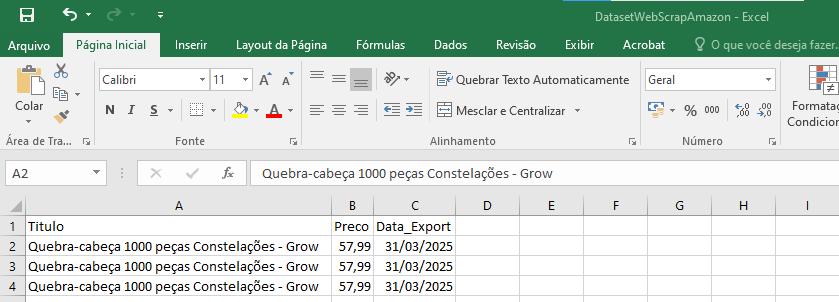